In [1]:
%%capture
!pip install ultralytics
!pip install Roboflow

In [2]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="BfO08P20KO7WV3VLoPso")
project = rf.workspace("objet-detect-yolov5").project("eep_detection-u9bbd")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.118, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to EEP_Detection-1 in yolov8:: 100%|██████████████| 6482/6482 [00:05<00:00, 1282.44it/s]


In [4]:
%cd EEP_Detection-1

C:\Users\ha934\Downloads\EEP_Detection-1


In [12]:
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=300 imgsz=540

/content/EEP_Detection-1
100% 6.23M/6.23M [00:00<00:00, 67.7MB/s]
Ultralytics YOLOv8.0.118 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/EEP_Detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=540, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

In [5]:
from IPython.display import Image, display, clear_output

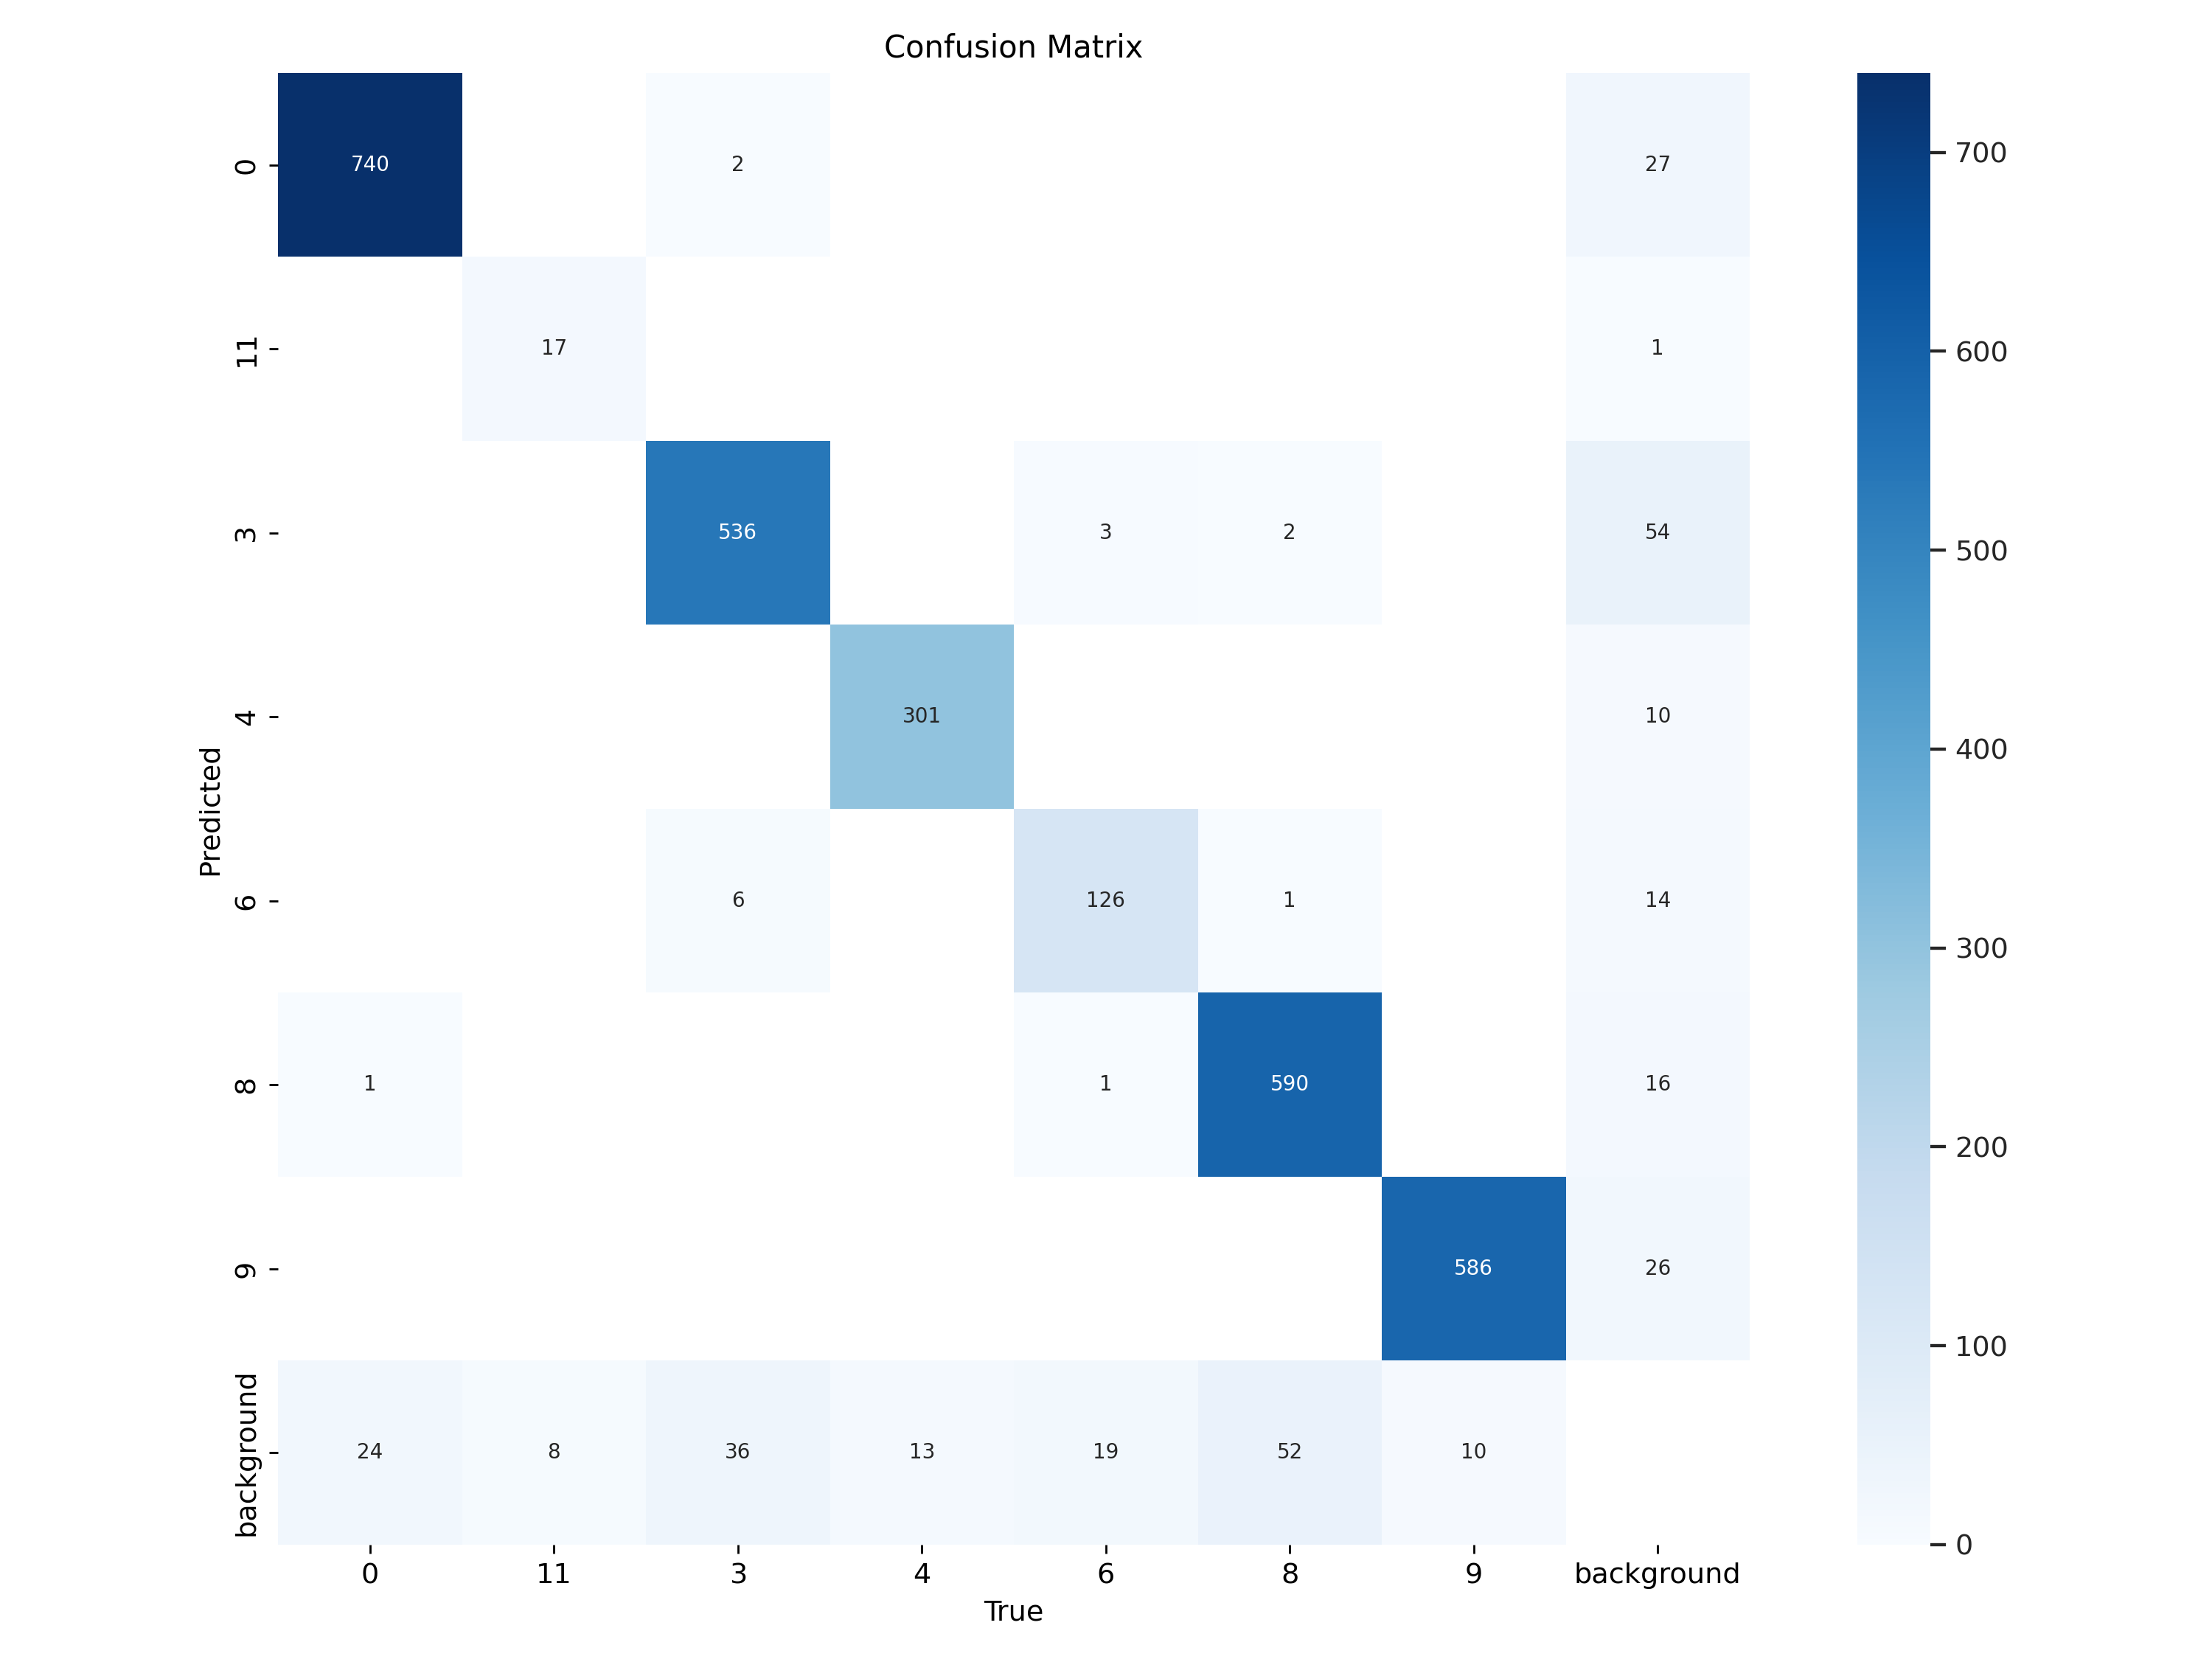

In [8]:
Image(filename=r'C:\Users\ha934\Downloads\runs\detect\train\confusion_matrix.png' , width=900)

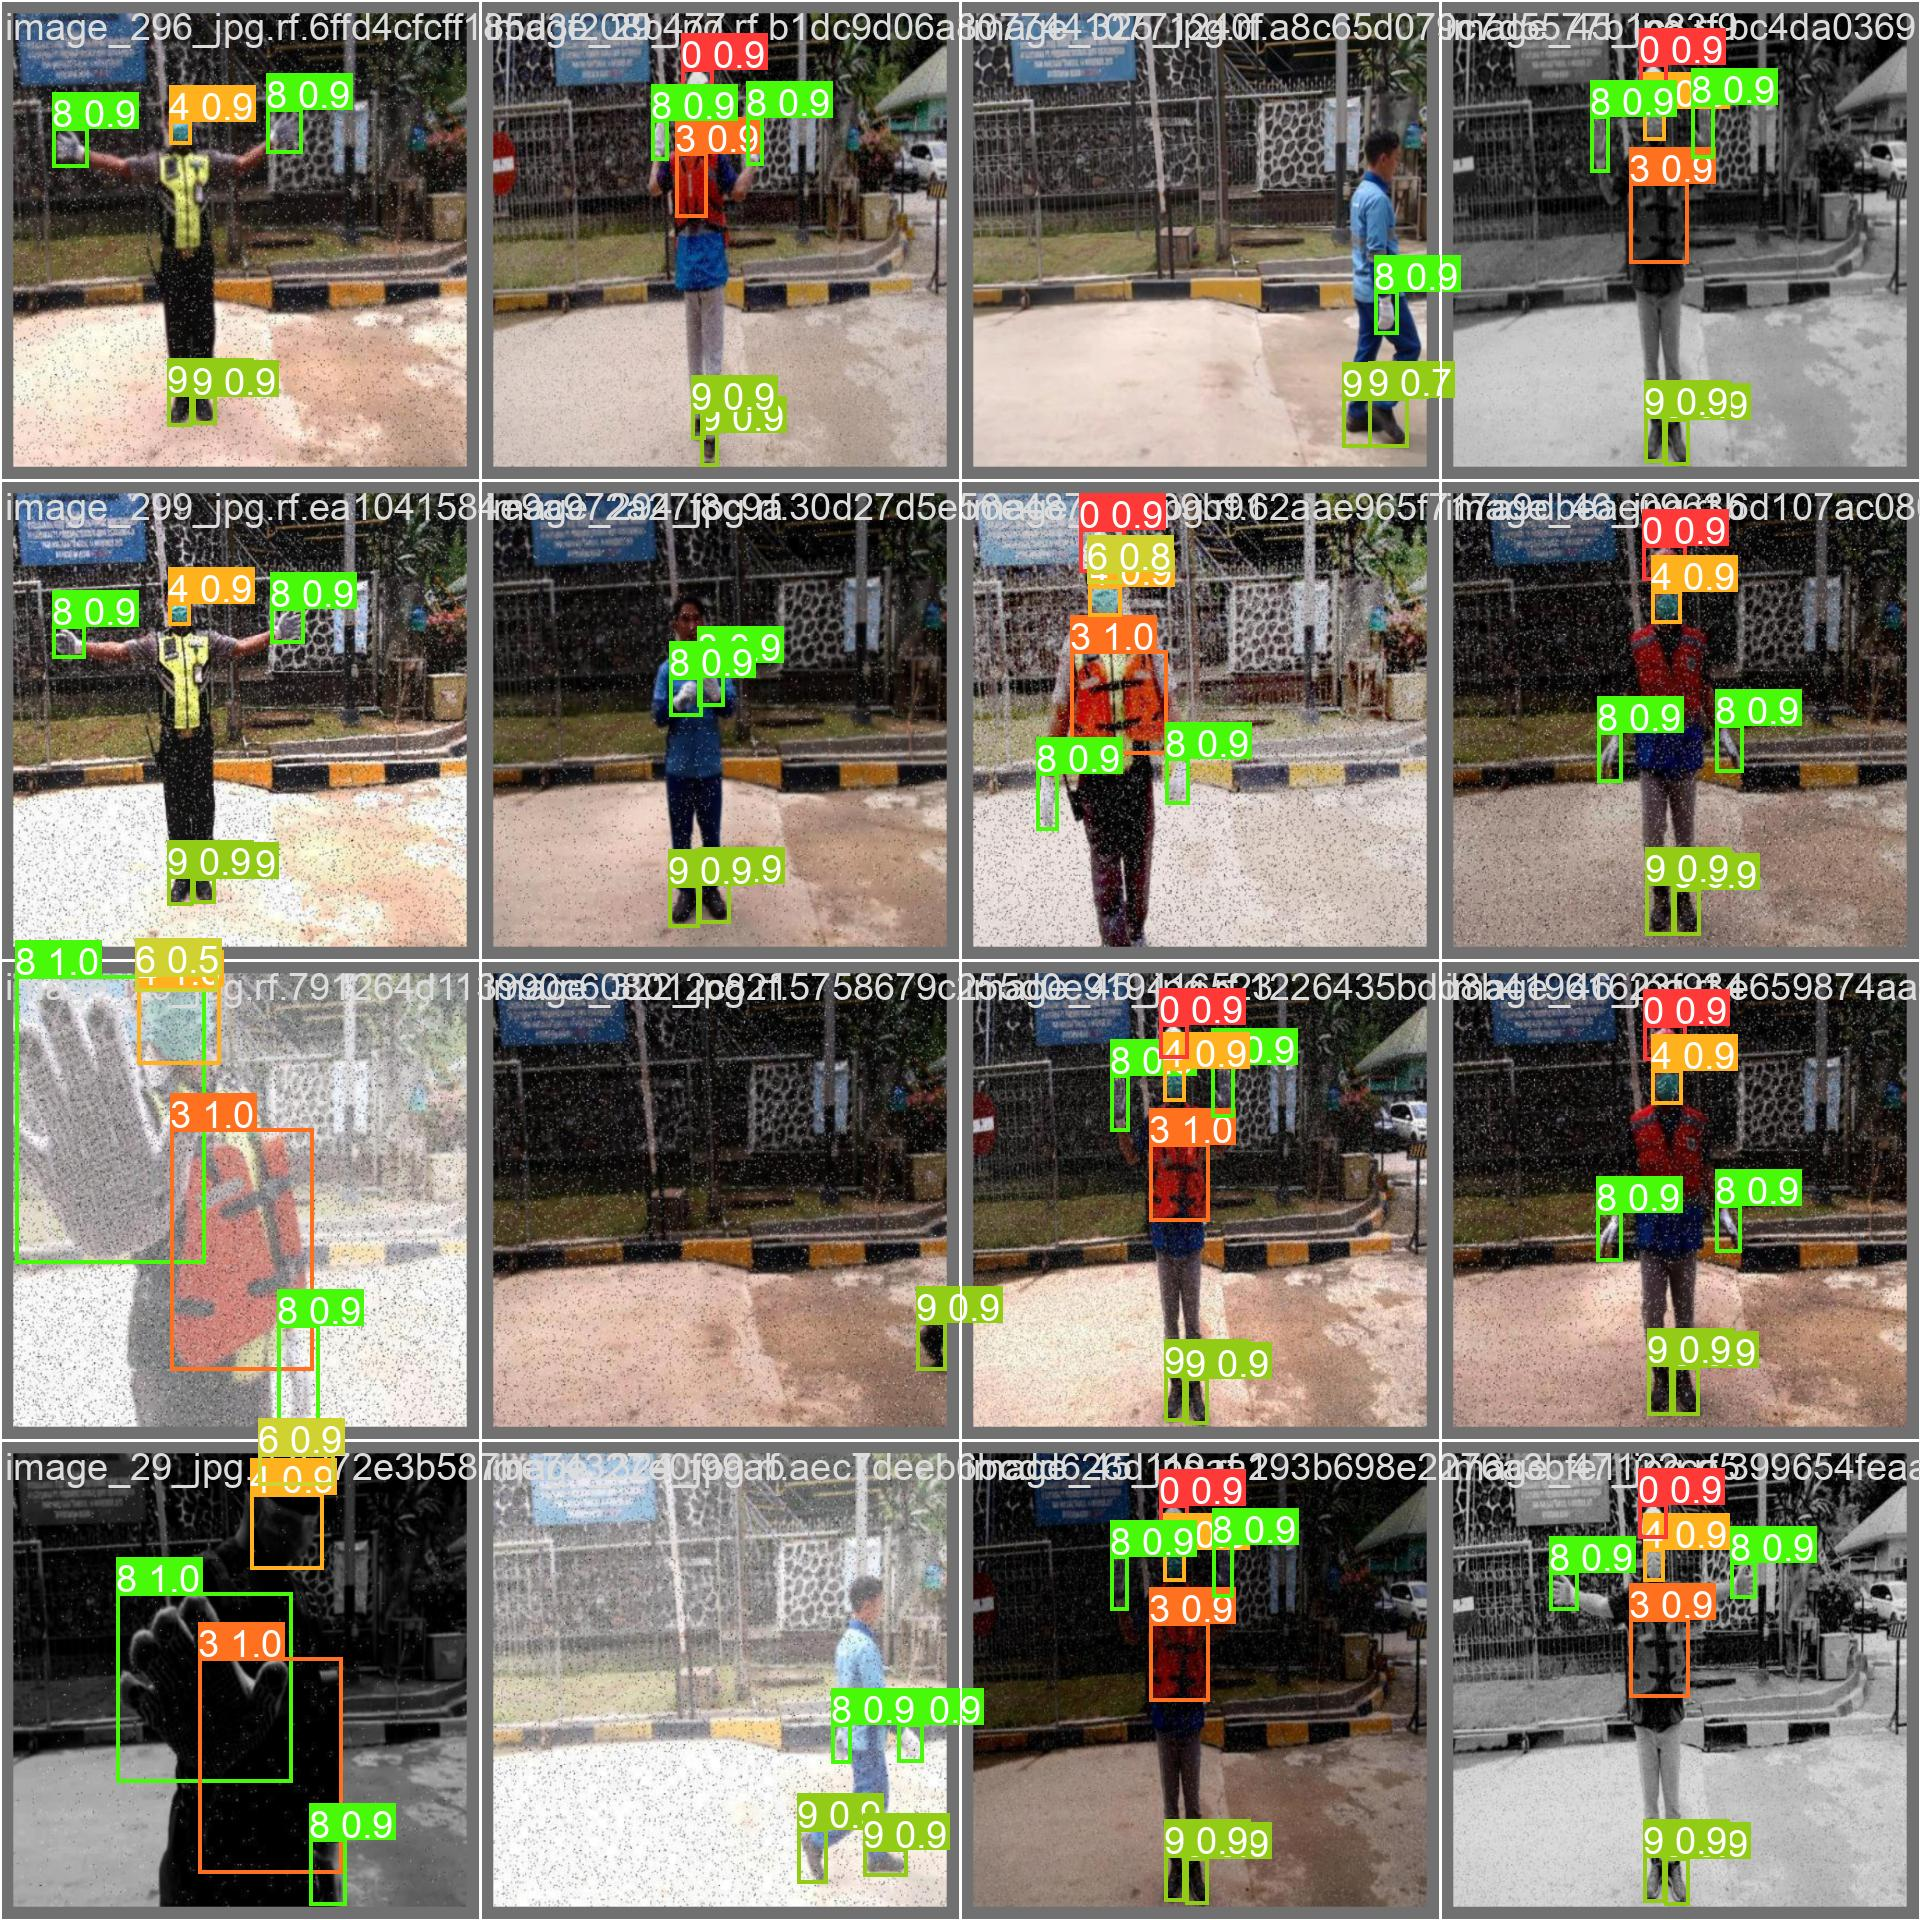

In [10]:
Image(filename=r"C:\Users\ha934\Downloads\runs\detect\train\val_batch1_pred.jpg" , width=600)

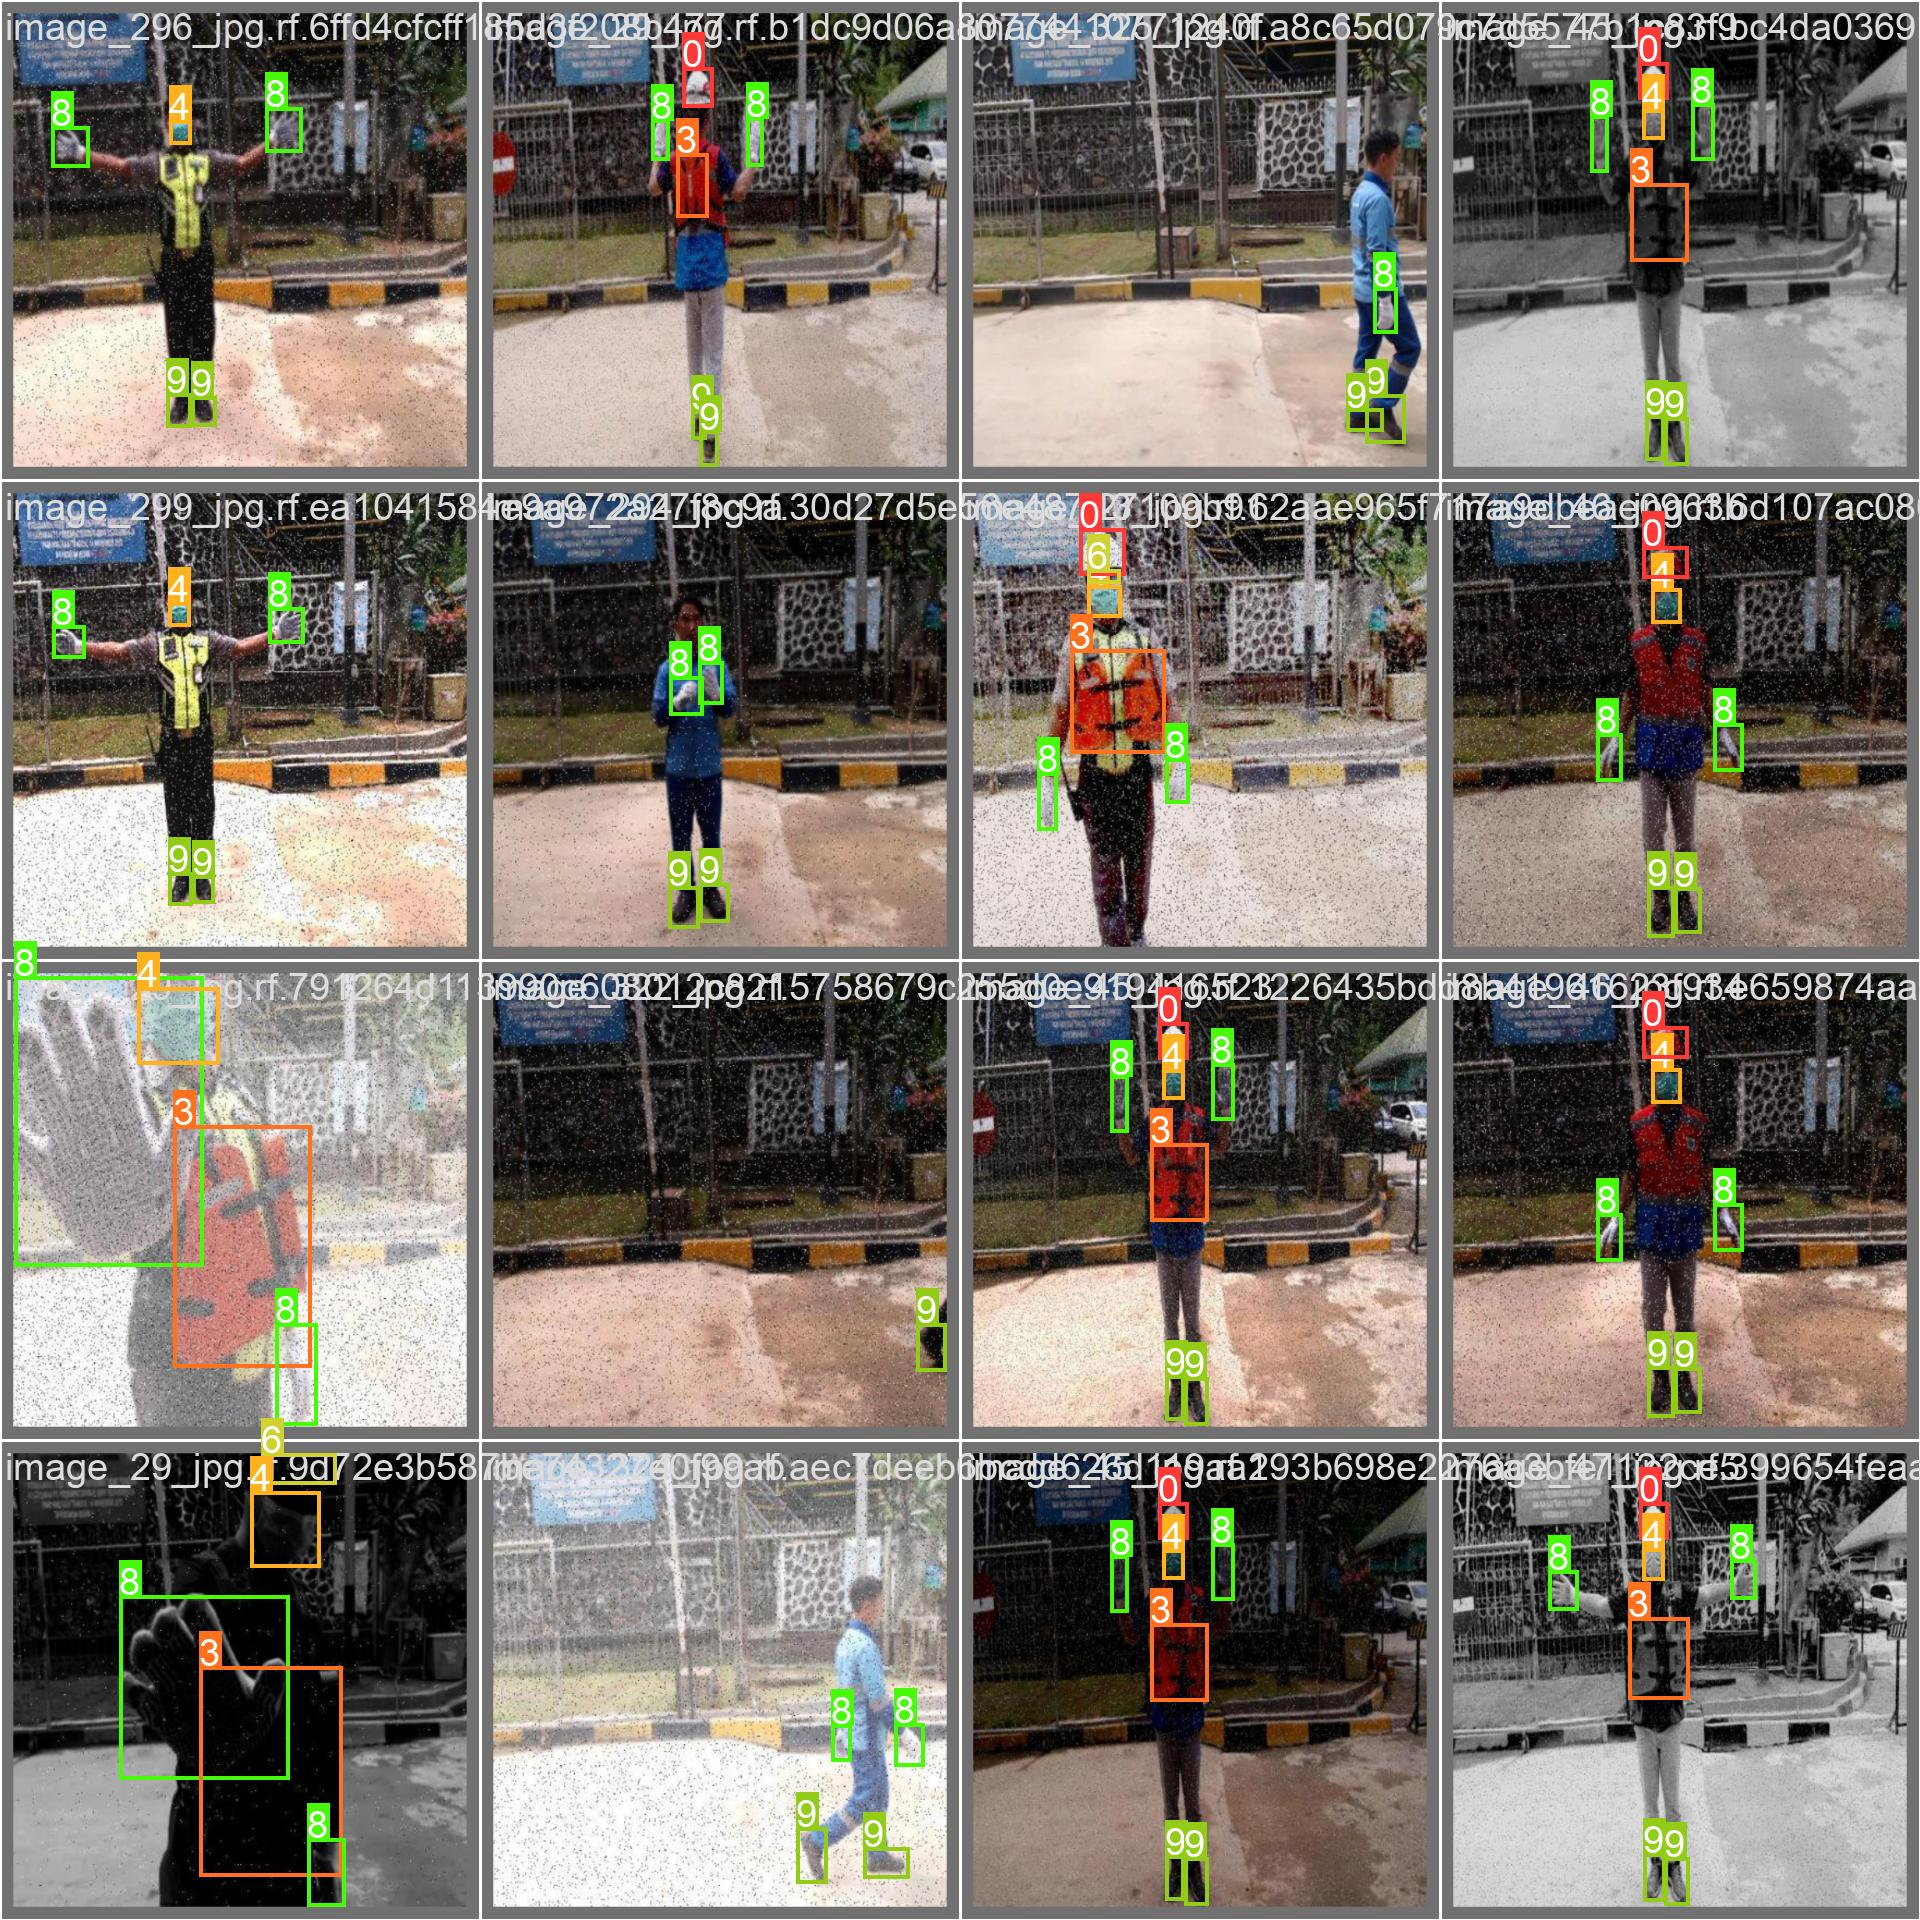

In [12]:
Image(filename=r"C:\Users\ha934\Downloads\runs\detect\train\val_batch1_labels.jpg" , width=600)

# validation

In [14]:
!yolo task=detect mode=val model=C:\Users\ha934\Downloads\runs\detect\train\weights\best.pt data=C:\Users\ha934\Downloads\EEP_Detection-1\data.yaml

Ultralytics YOLOv8.0.118  Python-3.9.13 torch-2.0.1+cpu CPU
Model summary (fused): 218 layers, 25843813 parameters, 0 gradients

val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels...:   0%|          | 0/647 [00:00<?, ?it/s]
val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels... 34 images, 0 backgrounds, 0 corrupt:   5%|5         | 34/647 [00:00<00:01, 339.99it/s]
val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels... 86 images, 0 backgrounds, 0 corrupt:  13%|#3        | 86/647 [00:00<00:01, 445.42it/s]
val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels... 139 images, 0 backgrounds, 0 corrupt:  21%|##1       | 139/647 [00:00<00:01, 473.53it/s]
val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels... 189 images, 0 backgrounds, 0 corrupt:  29%|##9       | 189/647 [00:00<00:00, 480.02it/s]
val: Scanning C:\Users\ha934\Downloads\EEP_Detection-1\valid\labels... 242 images, 0 backgrounds, 0 corrupt:  37%|###7     

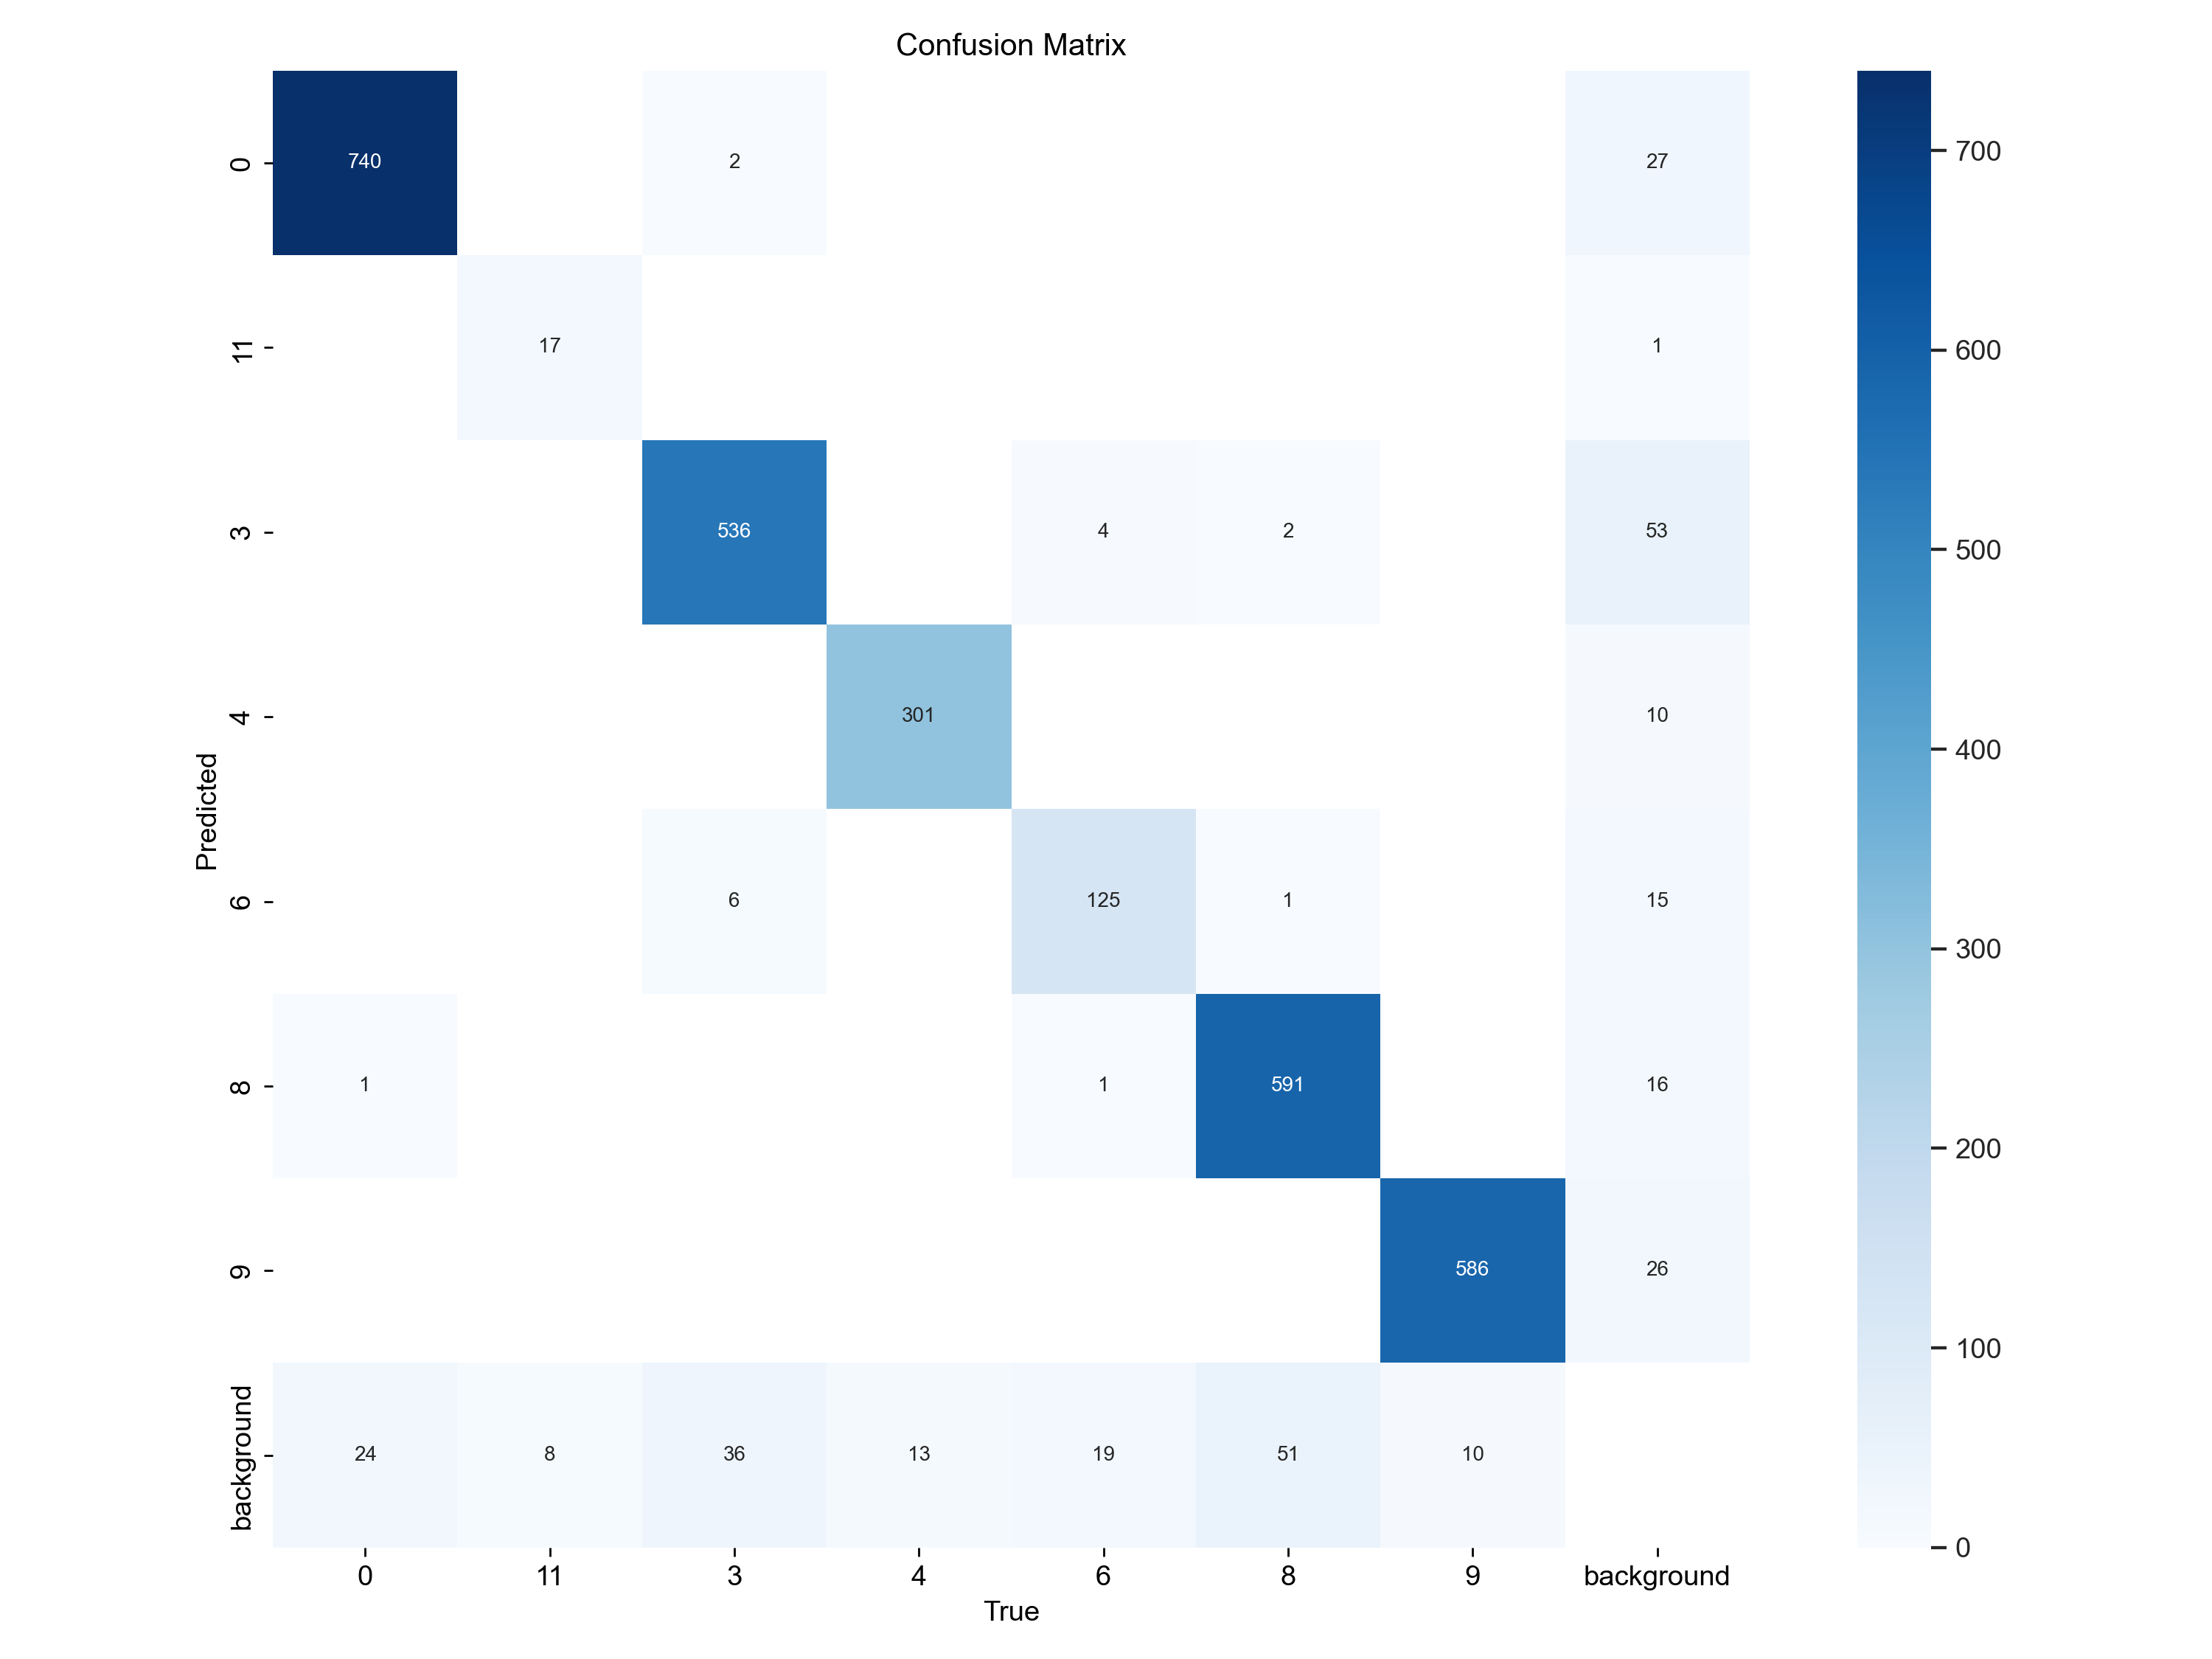

In [16]:
Image(filename=r"C:\Users\ha934\Downloads\EEP_Detection-1\runs\detect\val2\confusion_matrix.png" , width=600)

# Inference from camera video

In [19]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO

model = YOLO(r"C:\Users\ha934\Downloads\runs\detect\train\weights\best.pt")  #model path



cap = cv2.VideoCapture(0)

x_line=600

while cap.isOpened():
    print('s')
    # Read a frame from the video
    success, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))

    if success:

        # Run YOLOv8 inference on the frame
        resized_frame = cv2.resize(frame, (1280, 720), interpolation=cv2.INTER_LINEAR)
        cv2.line(resized_frame, (0, x_line), (width, x_line), (255, 0, 0), 10)

        # Visualize the results on the frame
        results = model(resized_frame, conf=0.6,classes=0)

        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    else:
        # Break the loop if the end of the video is reached
        break

cap.release()
cv2.destroyAllWindows()



s



0: 320x544 (no detections), 391.5ms
Speed: 4.3ms preprocess, 391.5ms inference, 20.7ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 413.0ms
Speed: 5.1ms preprocess, 413.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 403.2ms
Speed: 8.7ms preprocess, 403.2ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 394.3ms
Speed: 7.5ms preprocess, 394.3ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 395.9ms
Speed: 2.4ms preprocess, 395.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 397.0ms
Speed: 0.9ms preprocess, 397.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 393.7ms
Speed: 7.3ms preprocess, 393.7ms inference, 9.4ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 391.6ms
Speed: 2.2ms preprocess, 391.6ms inference, 1.2ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 402.3ms
Speed: 3.5ms preprocess, 402.3ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 395.2ms
Speed: 4.3ms preprocess, 395.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 402.6ms
Speed: 1.9ms preprocess, 402.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 382.3ms
Speed: 0.0ms preprocess, 382.3ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 349.2ms
Speed: 2.7ms preprocess, 349.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 309.2ms
Speed: 4.5ms preprocess, 309.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 305.5ms
Speed: 5.8ms preprocess, 305.5ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 308.8ms
Speed: 0.0ms preprocess, 308.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 306.2ms
Speed: 0.0ms preprocess, 306.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 305.8ms
Speed: 0.5ms preprocess, 305.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 307.9ms
Speed: 4.6ms preprocess, 307.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.7ms
Speed: 1.5ms preprocess, 313.7ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 315.4ms
Speed: 5.7ms preprocess, 315.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 310.1ms
Speed: 2.1ms preprocess, 310.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 315.4ms
Speed: 5.2ms preprocess, 315.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 318.9ms
Speed: 0.0ms preprocess, 318.9ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 301.6ms
Speed: 5.7ms preprocess, 301.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 434.1ms
Speed: 2.3ms preprocess, 434.1ms inference, 5.9ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 335.4ms
Speed: 8.3ms preprocess, 335.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 320.1ms
Speed: 0.0ms preprocess, 320.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 311.1ms
Speed: 0.0ms preprocess, 311.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 315.6ms
Speed: 4.6ms preprocess, 315.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 311.6ms
Speed: 6.0ms preprocess, 311.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 306.5ms
Speed: 2.7ms preprocess, 306.5ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 305.9ms
Speed: 5.7ms preprocess, 305.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 309.4ms
Speed: 1.2ms preprocess, 309.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 315.8ms
Speed: 1.7ms preprocess, 315.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 318.0ms
Speed: 0.0ms preprocess, 318.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 318.3ms
Speed: 0.0ms preprocess, 318.3ms inference, 3.5ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 325.8ms
Speed: 4.0ms preprocess, 325.8ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 314.6ms
Speed: 0.0ms preprocess, 314.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 311.3ms
Speed: 4.3ms preprocess, 311.3ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.6ms
Speed: 6.1ms preprocess, 313.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 303.5ms
Speed: 2.3ms preprocess, 303.5ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 308.2ms
Speed: 4.7ms preprocess, 308.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 309.2ms
Speed: 5.4ms preprocess, 309.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 317.2ms
Speed: 5.9ms preprocess, 317.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 297.7ms
Speed: 4.7ms preprocess, 297.7ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 303.9ms
Speed: 2.2ms preprocess, 303.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 307.1ms
Speed: 5.4ms preprocess, 307.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 350.8ms
Speed: 4.9ms preprocess, 350.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 384.2ms
Speed: 7.4ms preprocess, 384.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 310.4ms
Speed: 4.9ms preprocess, 310.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 311.2ms
Speed: 2.8ms preprocess, 311.2ms inference, 2.5ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 320.0ms
Speed: 0.0ms preprocess, 320.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 306.9ms
Speed: 1.1ms preprocess, 306.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 306.2ms
Speed: 3.5ms preprocess, 306.2ms inference, 2.9ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 325.6ms
Speed: 6.5ms preprocess, 325.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 381.4ms
Speed: 5.0ms preprocess, 381.4ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 330.3ms
Speed: 0.0ms preprocess, 330.3ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 298.8ms
Speed: 3.5ms preprocess, 298.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 307.6ms
Speed: 0.0ms preprocess, 307.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 311.2ms
Speed: 6.7ms preprocess, 311.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.0ms
Speed: 3.9ms preprocess, 313.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 298.6ms
Speed: 4.7ms preprocess, 298.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 328.1ms
Speed: 1.8ms preprocess, 328.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 320.9ms
Speed: 6.4ms preprocess, 320.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 319.1ms
Speed: 0.0ms preprocess, 319.1ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 307.2ms
Speed: 1.8ms preprocess, 307.2ms inference, 4.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 310.8ms
Speed: 1.0ms preprocess, 310.8ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.9ms
Speed: 4.0ms preprocess, 313.9ms inference, 3.6ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.9ms
Speed: 1.2ms preprocess, 313.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 319.9ms
Speed: 0.0ms preprocess, 319.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 312.8ms
Speed: 4.8ms preprocess, 312.8ms inference, 3.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 313.0ms
Speed: 4.9ms preprocess, 313.0ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 317.2ms
Speed: 5.7ms preprocess, 317.2ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 316.6ms
Speed: 6.7ms preprocess, 316.6ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 312.6ms
Speed: 5.8ms preprocess, 312.6ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 316.2ms
Speed: 5.2ms preprocess, 316.2ms inference, 38.5ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 317.9ms
Speed: 0.0ms preprocess, 317.9ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



s


0: 320x544 (no detections), 324.7ms
Speed: 2.2ms preprocess, 324.7ms inference, 0.0ms postprocess per image at shape (1, 3, 544, 544)



# inference from saved video path

In [15]:
import cv2
from ultralytics import YOLO

model = YOLO(r"C:\Users\ha934\Downloads\runs\detect\train\weights\best.pt")  # model path
r=model(r"C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4", conf=0.5)   #video path



    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 487.5ms
video 1/1 (2/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 457.0ms
video 1/1 (3/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 402.5ms
video 1/1 (4/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 393.8ms
video 1/1 (5/633) C:\

video 1/1 (71/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 299.9ms
video 1/1 (72/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 294.2ms
video 1/1 (73/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 300.2ms
video 1/1 (74/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 302.2ms
video 1/1 (75/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 291.3ms
video 1/1 (76/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 291.8ms
video 1/1 (77/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 297.3ms
video 1/1 (78/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 285.5ms
video 1/1 (79/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 292.7ms
v

video 1/1 (146/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 299.7ms
video 1/1 (147/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 303.1ms
video 1/1 (148/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 286.8ms
video 1/1 (149/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 299.2ms
video 1/1 (150/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 296.4ms
video 1/1 (151/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 300.9ms
video 1/1 (152/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 300.2ms
video 1/1 (153/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 298.4ms
video 1/1 (154/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 

video 1/1 (222/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 296.1ms
video 1/1 (223/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 291.5ms
video 1/1 (224/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 291.2ms
video 1/1 (225/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 293.7ms
video 1/1 (226/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 295.7ms
video 1/1 (227/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 296.9ms
video 1/1 (228/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 304.9ms
video 1/1 (229/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 1 6, 288.9ms
video 1/1 (230/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 296.4ms
video 1/1 (23

video 1/1 (297/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 313.1ms
video 1/1 (298/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 303.5ms
video 1/1 (299/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 293.0ms
video 1/1 (300/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 312.5ms
video 1/1 (301/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 304.8ms
video 1/1 (302/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 311.3ms
video 1/1 (303/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 301.7ms
video 1/1 (304/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 305.8ms
video 1/1 (305/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 309.7ms
video 1/1 (306/633) C:\Users\ha934\De

video 1/1 (373/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 295.8ms
video 1/1 (374/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 300.3ms
video 1/1 (375/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 288.2ms
video 1/1 (376/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 297.8ms
video 1/1 (377/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 293.1ms
video 1/1 (378/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 297.6ms
video 1/1 (379/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 294.8ms
video 1/1 (380/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 287.3ms
video 1/1 (381/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 2 0s, 303.5ms
video 1/1 (382/633) C:\Users\ha93

video 1/1 (448/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 3, 1 6, 301.0ms
video 1/1 (449/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 292.1ms
video 1/1 (450/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 312.9ms
video 1/1 (451/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 293.5ms
video 1/1 (452/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 299.2ms
video 1/1 (453/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 293.6ms
video 1/1 (454/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 297.5ms
video 1/1 (455/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 307.7ms
video 1/1 (456/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 

video 1/1 (523/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 317.5ms
video 1/1 (524/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 6, 314.1ms
video 1/1 (525/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 348.2ms
video 1/1 (526/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 338.8ms
video 1/1 (527/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 4, 327.0ms
video 1/1 (528/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 4, 324.7ms
video 1/1 (529/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 4, 325.6ms
video 1/1 (530/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 4, 323.5ms
video 1/1 (531/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 1 4, 333.5ms
vi

video 1/1 (598/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 312.7ms
video 1/1 (599/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 311.6ms
video 1/1 (600/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 314.4ms
video 1/1 (601/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 314.9ms
video 1/1 (602/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 314.7ms
video 1/1 (603/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 298.8ms
video 1/1 (604/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 303.0ms
video 1/1 (605/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 299.9ms
video 1/1 (606/633) C:\Users\ha934\Desktop\WhatsApp Video 2023-06-18 at 19.06.38.mp4: 320x544 1 0, 293.7ms
video 1/1 (607/633) C:\Users\ha934\De

In [16]:
for i in range(len(r)):
    r[i].names={0: 'helmet', 1: 'stop sign', 2: 'shield', 3: 'mask', 4: 'glasses', 5: 'golves', 6: 'shoes'} #labels

r1=[i.plot() for i in r]  

import cv2
import numpy as np

def create_video_from_frames(frames, output_file, fps=30):
    # Get the shape of the first frame
    height, width, _ = frames[0].shape

    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

    # Write each frame to the video file
    for frame in frames:
        out.write(frame)

    # Release the VideoWriter object
    out.release()


# Call the function to create the video
create_video_from_frames(r1, 'out.mp4', fps=30)
